In [1]:
import pandas as pd
import sklearn
import numpy as np
import sys
sys.path.append('../utils/')
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn import metrics

from series_plot import plot_multi_series
from computation import *
from processing import *

In [2]:
# read data 
data = pd.read_csv('../data/continuous_data.csv')
keys = data.keys()




['[123] No.1 Soil Press (Bulkhead)', '[124] No.2 Soil Press (Bulkhead)', '[125] No.3 Soil Press (Bulkhead)', '[126] No.4 Soil Press (Bulkhead)', '[127] No.5 Soil Press (Bulkhead)', '[128] No.6 Soil Press (Bulkhead)', '[129] No.7 Soil Press (Bulkhead)', '[130] No.8 Soil Press (Bulkhead)', '[131] No.9 Soil Press (Bulkhead)', '[132] No.10 Soil Press (Bulkhead)', '[133] No.11 Soil Press (Bulkhead)', '[134] No.12 Soil Press (Bulkhead)', '[135] No.1 Soil Press Outer Circumference', '[136] No.2 Soil Press Outer Circumference', '[137] No.3 Soil Press Outer Circumference', '[138] No.4 Soil Press Outer Circumference', '[139] No.5 Soil Press Outer Circumference', '[140] No.6 Soil Press Outer Circumference', '[244] Soil Press (Earth Collapsing)']


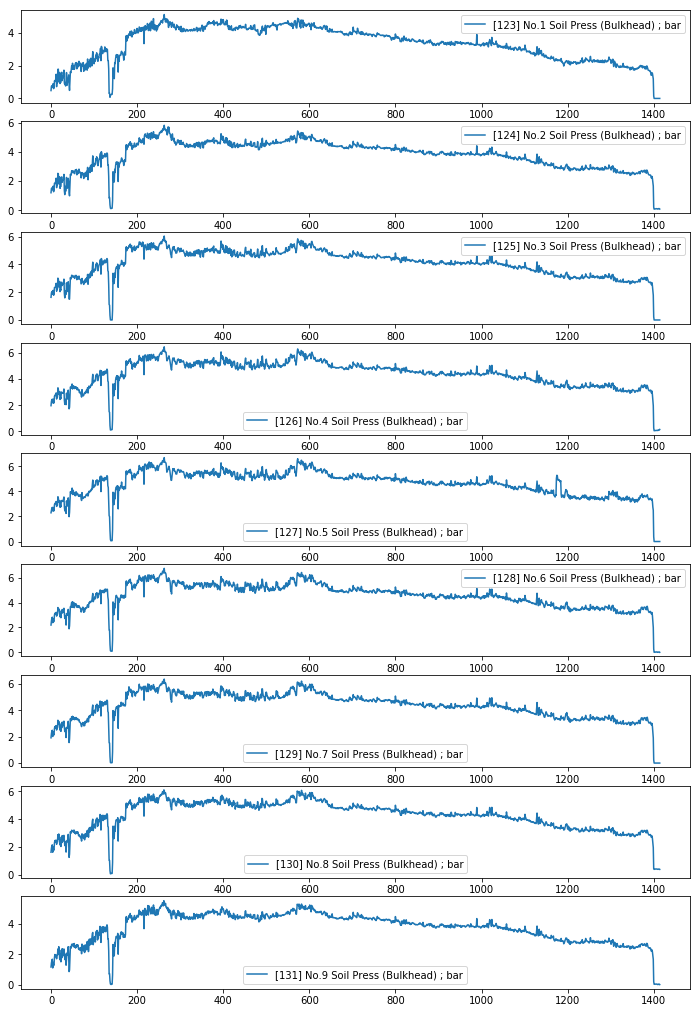

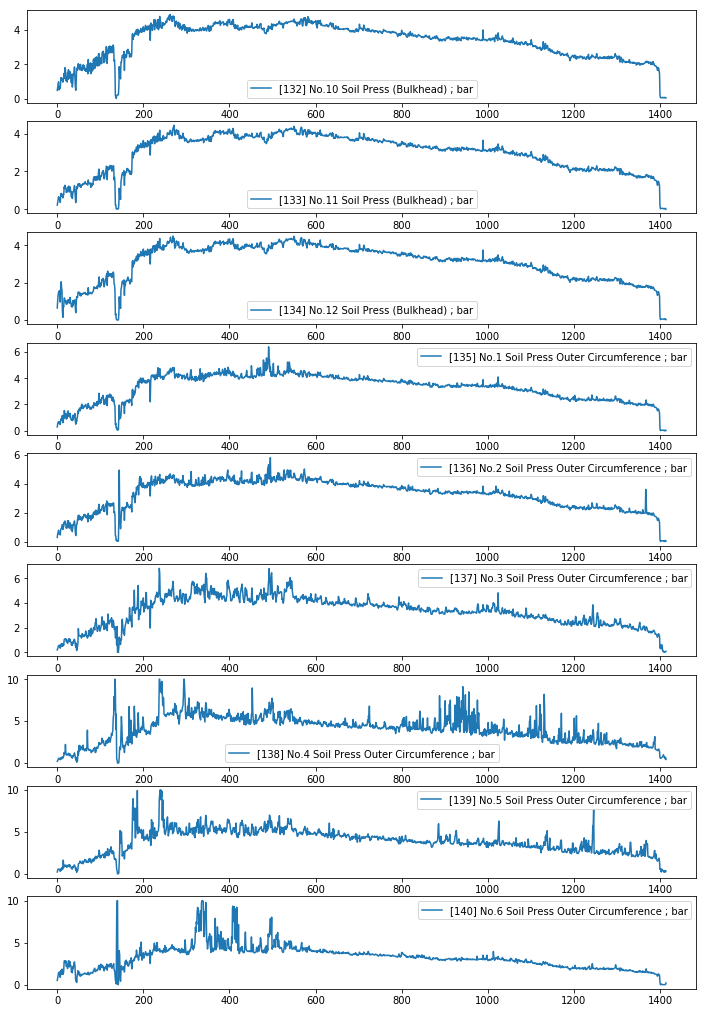

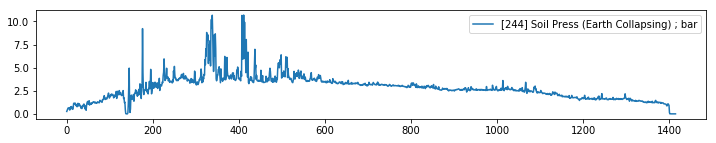

True

In [3]:
press_keys = search_k(["soil","press"],keys,not_s=['Casings','limit','max','min','Back-Filling'],thre=0.8)
print (press_keys)

series_data,sample_keys = get_series_data(data,press_keys)
plot_multi_series(series_data,title_names=sample_keys)

In [4]:
pressure_key_name = [press_keys[4]]
series_data,sample_keys = get_series_data(data,pressure_key_name)

In [5]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [6]:
s_data = moving_average(series_data,10).reshape(1,-1)

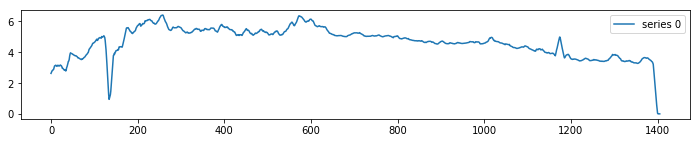

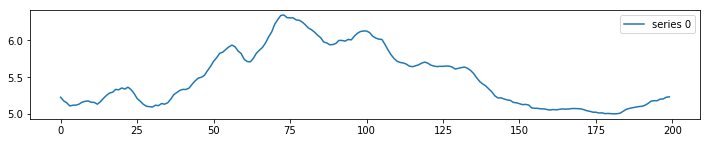

True

In [7]:
plot_multi_series(s_data)
plot_multi_series(s_data[:,500:700])

# data start to decrease at ring number 600

In [8]:
from glob import glob

In [9]:
paths = glob('../data/20mm_data/00000/DL*.Csv')
data_csv_list = []
lower_thre , upper_thre = 500,700
for path in paths:
    ring_num = int(path[-8:-4])
    if (ring_num >= lower_thre) and (ring_num<=upper_thre):
        data_csv_list.append(path)
        
data_csv_list = sorted(data_csv_list)

In [10]:
frames = []
for p in data_csv_list:
    print (p)
    ring_data = pd.read_csv(p)
    frames.append(ring_data)


../data/20mm_data/00000/DL00500.Csv
../data/20mm_data/00000/DL00501.Csv
../data/20mm_data/00000/DL00502.Csv
../data/20mm_data/00000/DL00503.Csv
../data/20mm_data/00000/DL00504.Csv
../data/20mm_data/00000/DL00505.Csv
../data/20mm_data/00000/DL00506.Csv
../data/20mm_data/00000/DL00507.Csv
../data/20mm_data/00000/DL00508.Csv
../data/20mm_data/00000/DL00509.Csv
../data/20mm_data/00000/DL00510.Csv
../data/20mm_data/00000/DL00511.Csv
../data/20mm_data/00000/DL00512.Csv
../data/20mm_data/00000/DL00513.Csv
../data/20mm_data/00000/DL00514.Csv
../data/20mm_data/00000/DL00515.Csv
../data/20mm_data/00000/DL00516.Csv
../data/20mm_data/00000/DL00517.Csv
../data/20mm_data/00000/DL00518.Csv
../data/20mm_data/00000/DL00519.Csv
../data/20mm_data/00000/DL00520.Csv
../data/20mm_data/00000/DL00521.Csv
../data/20mm_data/00000/DL00522.Csv
../data/20mm_data/00000/DL00523.Csv
../data/20mm_data/00000/DL00524.Csv
../data/20mm_data/00000/DL00525.Csv
../data/20mm_data/00000/DL00526.Csv
../data/20mm_data/00000/DL00

In [11]:
data_500_700 = pd.concat(frames)

In [12]:
data_500_700.to_csv('../data/data_500_700.csv')

In [13]:
keys = data_500_700.keys()
press_keys = search_k(["soil","press"],keys,not_s=['Casings','limit','max','min','Back-Filling'],thre=0.8)
print (press_keys)

['[123]No.1 Soil Press (Bulkhead)', '[124]No.2 Soil Press (Bulkhead)', '[125]No.3 Soil Press (Bulkhead)', '[126]No.4 Soil Press (Bulkhead)', '[127]No.5 Soil Press (Bulkhead)', '[128]No.6 Soil Press (Bulkhead)', '[129]No.7 Soil Press (Bulkhead)', '[130]No.8 Soil Press (Bulkhead)', '[131]No.9 Soil Press (Bulkhead)', '[132]No.10 Soil Press (Bulkhead)', '[133]No.11 Soil Press (Bulkhead)', '[134]No.12 Soil Press (Bulkhead)', '[135]No.1 Soil Press Outer Circumference', '[136]No.2 Soil Press Outer Circumference', '[137]No.3 Soil Press Outer Circumference', '[138]No.4 Soil Press Outer Circumference', '[139]No.5 Soil Press Outer Circumference', '[140]No.6 Soil Press Outer Circumference', '[244]Soil Press (Earth Collapsing)']


In [14]:
thrust_force_keys = search_k(["thrust","force"],keys,not_s=["not","caution","over","limit"],thre=0.8)
print(thrust_force_keys) 

['[9]Total Thrust Force', '[10]Articulation Total Thrust Force', '[11][DEL]CHD Support Total Thrust Force', '[6009]CUTTER HEAD THRUST FORCE ABNORMAL', '[6010]CUTTER HEAD THRUST FORCE DIFF.CAUTION', '[6011]CUTTER HEAD THRUST FORCE DIFF.ABNORMAL']


In [50]:
thrust_speed_keys = search_k(["thrust","speed"],keys,not_s=["not","caution","over","limit"],thre=0.8)
print(thrust_speed_keys) 

cutter_torque_keys = search_k(["cutter","torque"],keys,not_s=["not","caution","over","limit"],thre=0.8)
cutter_torque_keys

['[2527][c]Thrust Speed Average']


['[7]Cutter Torque',
 '[409]#1 Cutter Torque',
 '[410]#2 Cutter Torque',
 '[411]#3 Cutter Torque',
 '[412]#4 Cutter Torque',
 '[413]#5 Cutter Torque',
 '[414]#6 Cutter Torque',
 '[415]#7 Cutter Torque',
 '[416]#8 Cutter Torque',
 '[418]#10 Cutter Torque',
 '[419]#11 Cutter Torque',
 '[421]#13 Cutter Torque(No.9 Motor)',
 '[422]#14 Cutter Torque',
 '[423]#15 Cutter Torque',
 '[424]#16 Cutter Torque',
 '[425]#17 Cutter Torque',
 '[426]#18 Cutter Torque',
 '[427]#19 Cutter Torque',
 '[428]#20 Cutter Torque',
 '[429]#21 Cutter Torque',
 '[430]#22 Cutter Torque',
 '[431]#23 Cutter Torque',
 '[432]#24 Cutter Torque',
 '[2158]Cutter Torque Low',
 '[2495]Cutter Torque']

In [44]:
df = data_500_700[data_500_700['[123]No.1 Soil Press (Bulkhead)'] != 'bar']

In [52]:
series_data = df[['[127]No.5 Soil Press (Bulkhead)',
                  '[9]Total Thrust Force',
                  '[2527][c]Thrust Speed Average',
                 '[2495]Cutter Torque']]

In [53]:
data_clean = series_data.dropna()

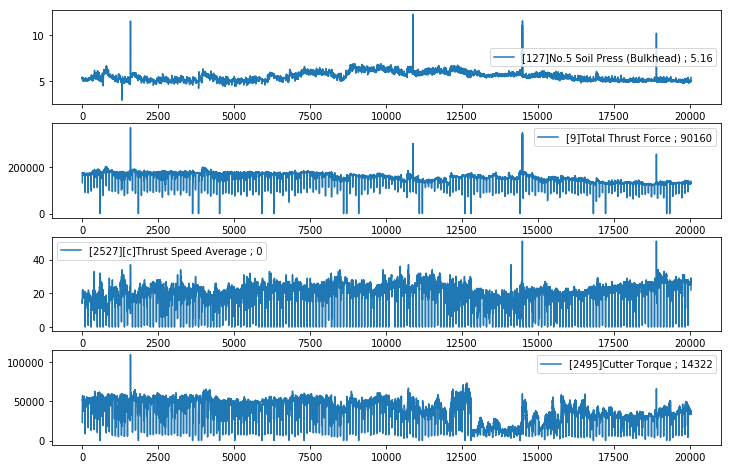

True

In [54]:
series_data,sample_keys = get_series_data(data_clean,['[127]No.5 Soil Press (Bulkhead)',
                                                      '[9]Total Thrust Force',
                                                     '[2527][c]Thrust Speed Average',
                                                     
                                                     '[2495]Cutter Torque'])
plot_multi_series(series_data,title_names=sample_keys)

In [55]:
prev_val = 133159
tf_clean = []
thre = 0.8
for val in series_data[1,:]:
    diff = val-prev_val
    ratio = abs(diff)/prev_val
    if ratio > thre:
        if diff>0:
            val = prev_val
        elif diff<0:
            val = prev_val
    tf_clean.append(val)
tf_clean = np.array(tf_clean)

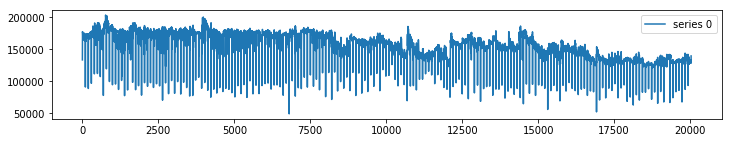

True

In [56]:
plot_multi_series(tf_clean.reshape(1,-1))

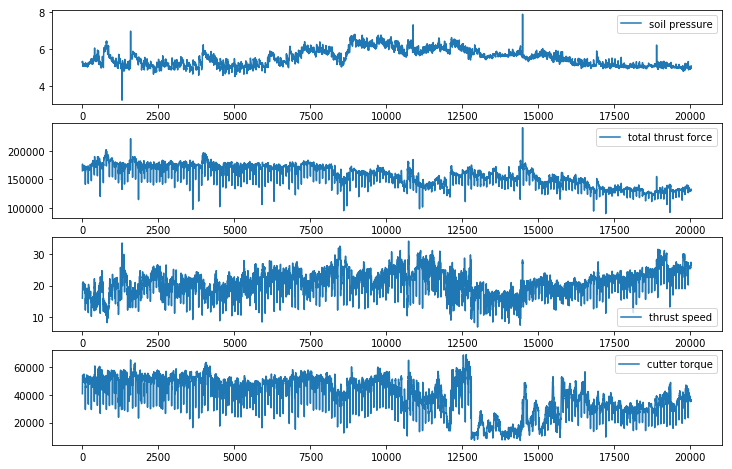

True

In [57]:
s_data_pressure = moving_average(series_data[:1,:],5).reshape(1,-1)
s_data_tf = moving_average(series_data[1:2,:],5).reshape(1,-1)
s_data_ts = moving_average(series_data[2:3,:],5).reshape(1,-1)
s_data_ct = moving_average(series_data[3:,:],5).reshape(1,-1)
s_data = np.concatenate([s_data_pressure,s_data_tf,s_data_ts,s_data_ct],axis = 0)
plot_multi_series(s_data,title_names=['soil pressure',
                                      'total thrust force',
                                      'thrust speed',
                                     'cutter torque'])

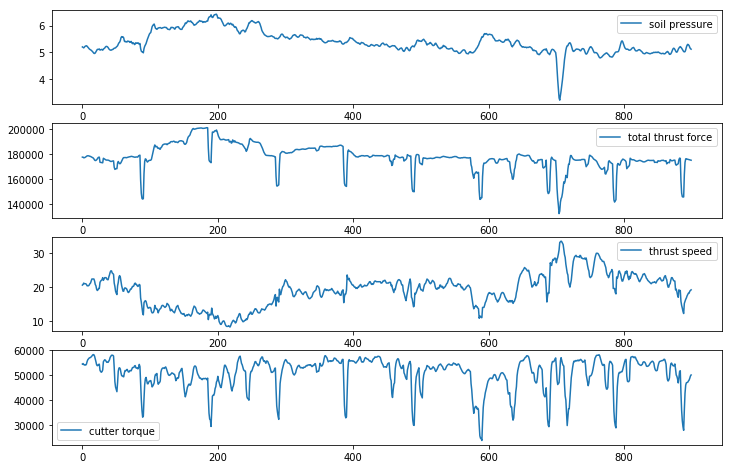

True

In [59]:
s_data_pressure = moving_average(series_data[:1,],5)[600:1500].reshape(1,-1)
s_data_tf = moving_average(series_data[1:2,:],5)[600:1500].reshape(1,-1)
s_data_ts = moving_average(series_data[2:3,:],5)[600:1500].reshape(1,-1)
s_data_ct = moving_average(series_data[3:,:],5)[600:1500].reshape(1,-1)
s_data = np.concatenate([s_data_pressure,s_data_tf,s_data_ts,s_data_ct],axis = 0)
plot_multi_series(s_data,title_names=['soil pressure',
                                      'total thrust force',
                                      'thrust speed',
                                     'cutter torque'])

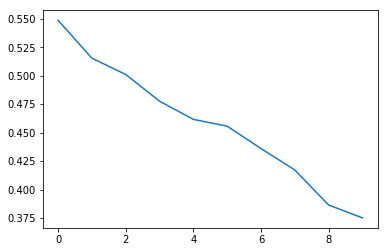

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

ccf1 = sm.tsa.stattools.ccf(s_data_pressure[0],s_data_tf[0],unbiased=False)
plt.plot(ccf1[:10])